In [1]:
import pandas as pd
import networkx as nx
from scipy import stats
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [2]:
df = pd.read_excel('SignEpiPairs.xlsx')
df=df[df.pBon<0.05]

### 1. Dimensions

In [235]:
graph = df[df.SegN==12]
graph = graph.reset_index(drop=True)

In [245]:
H = nx.Graph()

for i in range(len(graph)):
    node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
    node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i]) 
    if node1 not in H.nodes():
        H.add_node(node1)
    if node2 not in H.nodes():
        H.add_node(node2)
    H.add_edge(node1, node2, {'color':'gray','thickness':2})

In [237]:
max(nx.greedy_color(H).values())+1

4

***

s1 -- 5

s2 -- 5

s3 -- 5

s4 -- 3

s5 -- 7

s6 -- 5

s8 -- 4

s9 -- 2

s11 -- 4

s12 -- 4

***

In [238]:
x = [5,5,5,3,7,5,3,2,4,4]
y = [len(df[df.SegN==i]) for i in [1,2,3,4,5,6,8,9,11,12]]

In [239]:
_,_,R,_,_=stats.linregress(x,y)
R

0.6279271738085509

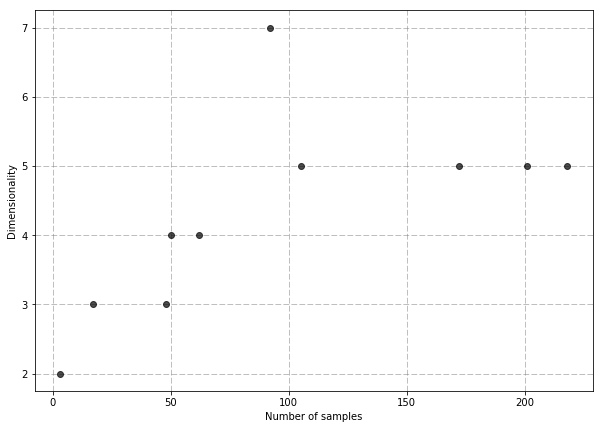

In [240]:
plt.figure(figsize=[10,7])
plt.plot(y,x,'ok', alpha = 0.7)
plt.xlabel('Number of samples')
plt.ylabel('Dimensionality')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray');

### 2. Graphs visualization

In [3]:
%run '../NN/scripts/Functions.ipynb'
import networkx as nx

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [20]:
df = pd.read_excel('SignEpiPairs.xlsx')
df = df[df.pBon<0.05]

for chunk in chunks:
    print chunk
    
    graph = df[df.SegN==int(chunk[1:])]
    graph = graph.reset_index(drop=True)
    nodes = {}

    for i in set(graph['VarPos']):
        nodes[i] = []
    for i in set(graph['SubPos']):
        nodes[i] = []

    for i in range(len(graph)):
        node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
        node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
        if node1 not in nodes[graph['VarPos'].ix[i]]:
            nodes[graph['VarPos'].ix[i]].append(node1)
        if node2 not in nodes[graph['SubPos'].ix[i]]:
            nodes[graph['SubPos'].ix[i]].append(node2)
            
    H = nx.Graph()
    H.size = {}
    H.color = {}
    H.width = {}
    edges = []

    for i in range(len(graph)):
        node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
        node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
        edges.append([node1, node2])


    for key in nodes:
        for node in nodes[key]:
            H.add_node(node)
            H.size[node]=10000
            H.color[node]='gray'

    edges = sorted(edges)

    for edge in edges:
        if [edge[1],edge[0]] in edges:
            H.add_edge(edge[0], edge[1], {'color':'#00AEEF', 'thickness':5})
        else:
            H.add_edge(edge[0], edge[1], {'color':'gray', 'thickness':2})

    color=[attribs['color'] for (v_from,v_to,attribs) in H.edges(data=True)]
    thickness=[attribs['thickness'] for (v_from,v_to,attribs) in H.edges(data=True)]
    
    nodeList = [x for x in H.nodes()]
    
    nodesDF = pd.DataFrame(columns = ['id','label'])
    nodesDF['id']=nodeList
    nodesDF['label']=nodeList
    nodesDF['position']=[int(x[:-2]) for x in nodeList]
    nodesDF.sort(['position'],inplace=True)
    nodesDF.to_csv('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/Fig3/s' + str(chunk[1:]) + 'Nodes.csv')
    
    edgesDF = pd.DataFrame(columns=['source','target'], index=[x for x in range(len(edges))])
    
    edgeGroups = []
    for edge in edges:
        if [edge[1],edge[0]] in edges:
            edgeGroups.append(1)
        else:
            edgeGroups.append(0)
            
    edgesDF['source']=[x[0] for x in edges]
    edgesDF['target']=[x[1] for x in edges]
    edgesDF['group']=edgeGroups

    edgesDF.to_csv('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/Fig3/s' + str(chunk[1:]) + 'Edges.csv')

S1
S2
S3


/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:59: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


S4
S5
S6
S7
S8
S9
S10
S11
S12


In [ ]:
chunk

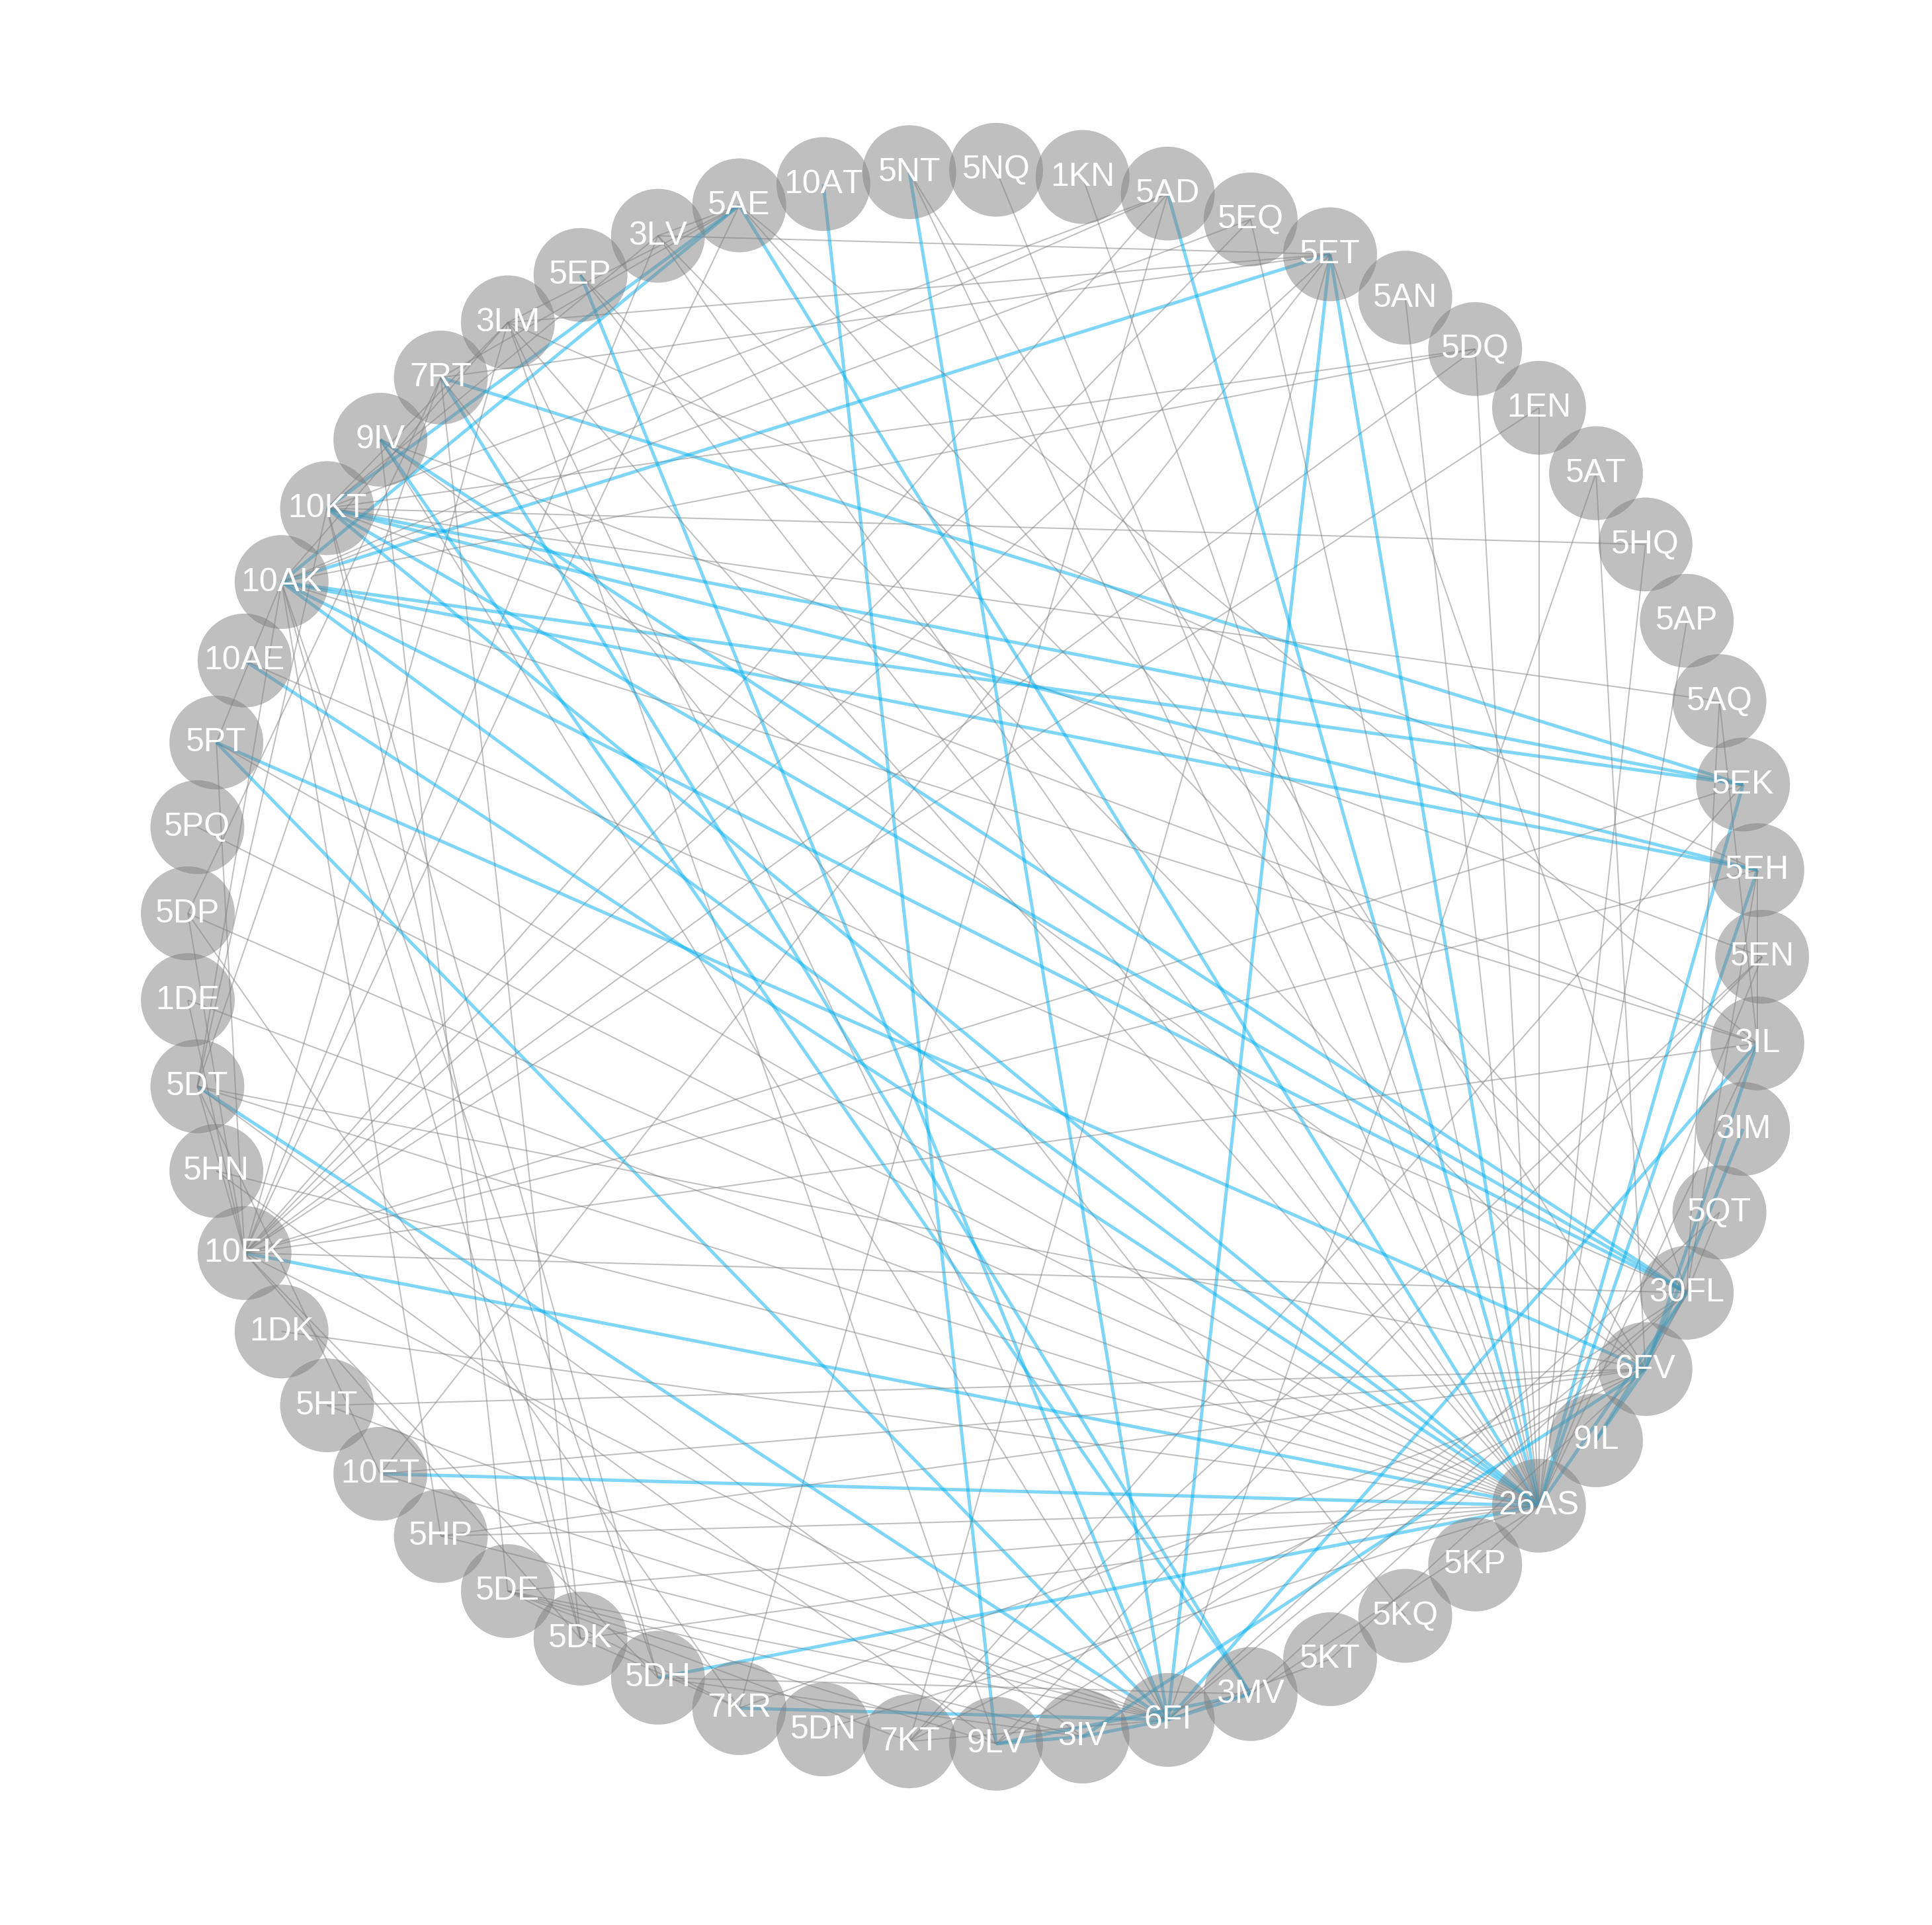

In [11]:
plt.figure(figsize=[40,40])
nx.draw_circular(H, with_labels=True,
                 node_size=20000, alpha=0.5, node_color=[H.color[v] for v in H],
                 font_size=50, font_color='white',edge_color=color,width=thickness)

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
